In [2]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
class HierarchialClustering:
    def __init__(self, data):
        self.data = data
        self.linkage_type = "single"
        self.metric = "euclidean"
        self.curr_linkage = None 
    
    def get_linkages(self, linkage_type, metric):
        self.linkage_type = linkage_type
        self.metric = metric
        self.curr_linkage = linkage(self.data, method = self.linkage_type, metric = self.metric)
        return self.curr_linkage
        
    def dendogram(self, linkage_mat):
        plt.figure(figsize=(25, 25))
        dendrogram(linkage_mat)
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('Data Points')
        plt.ylabel('Distance')
        plt.show()

      Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


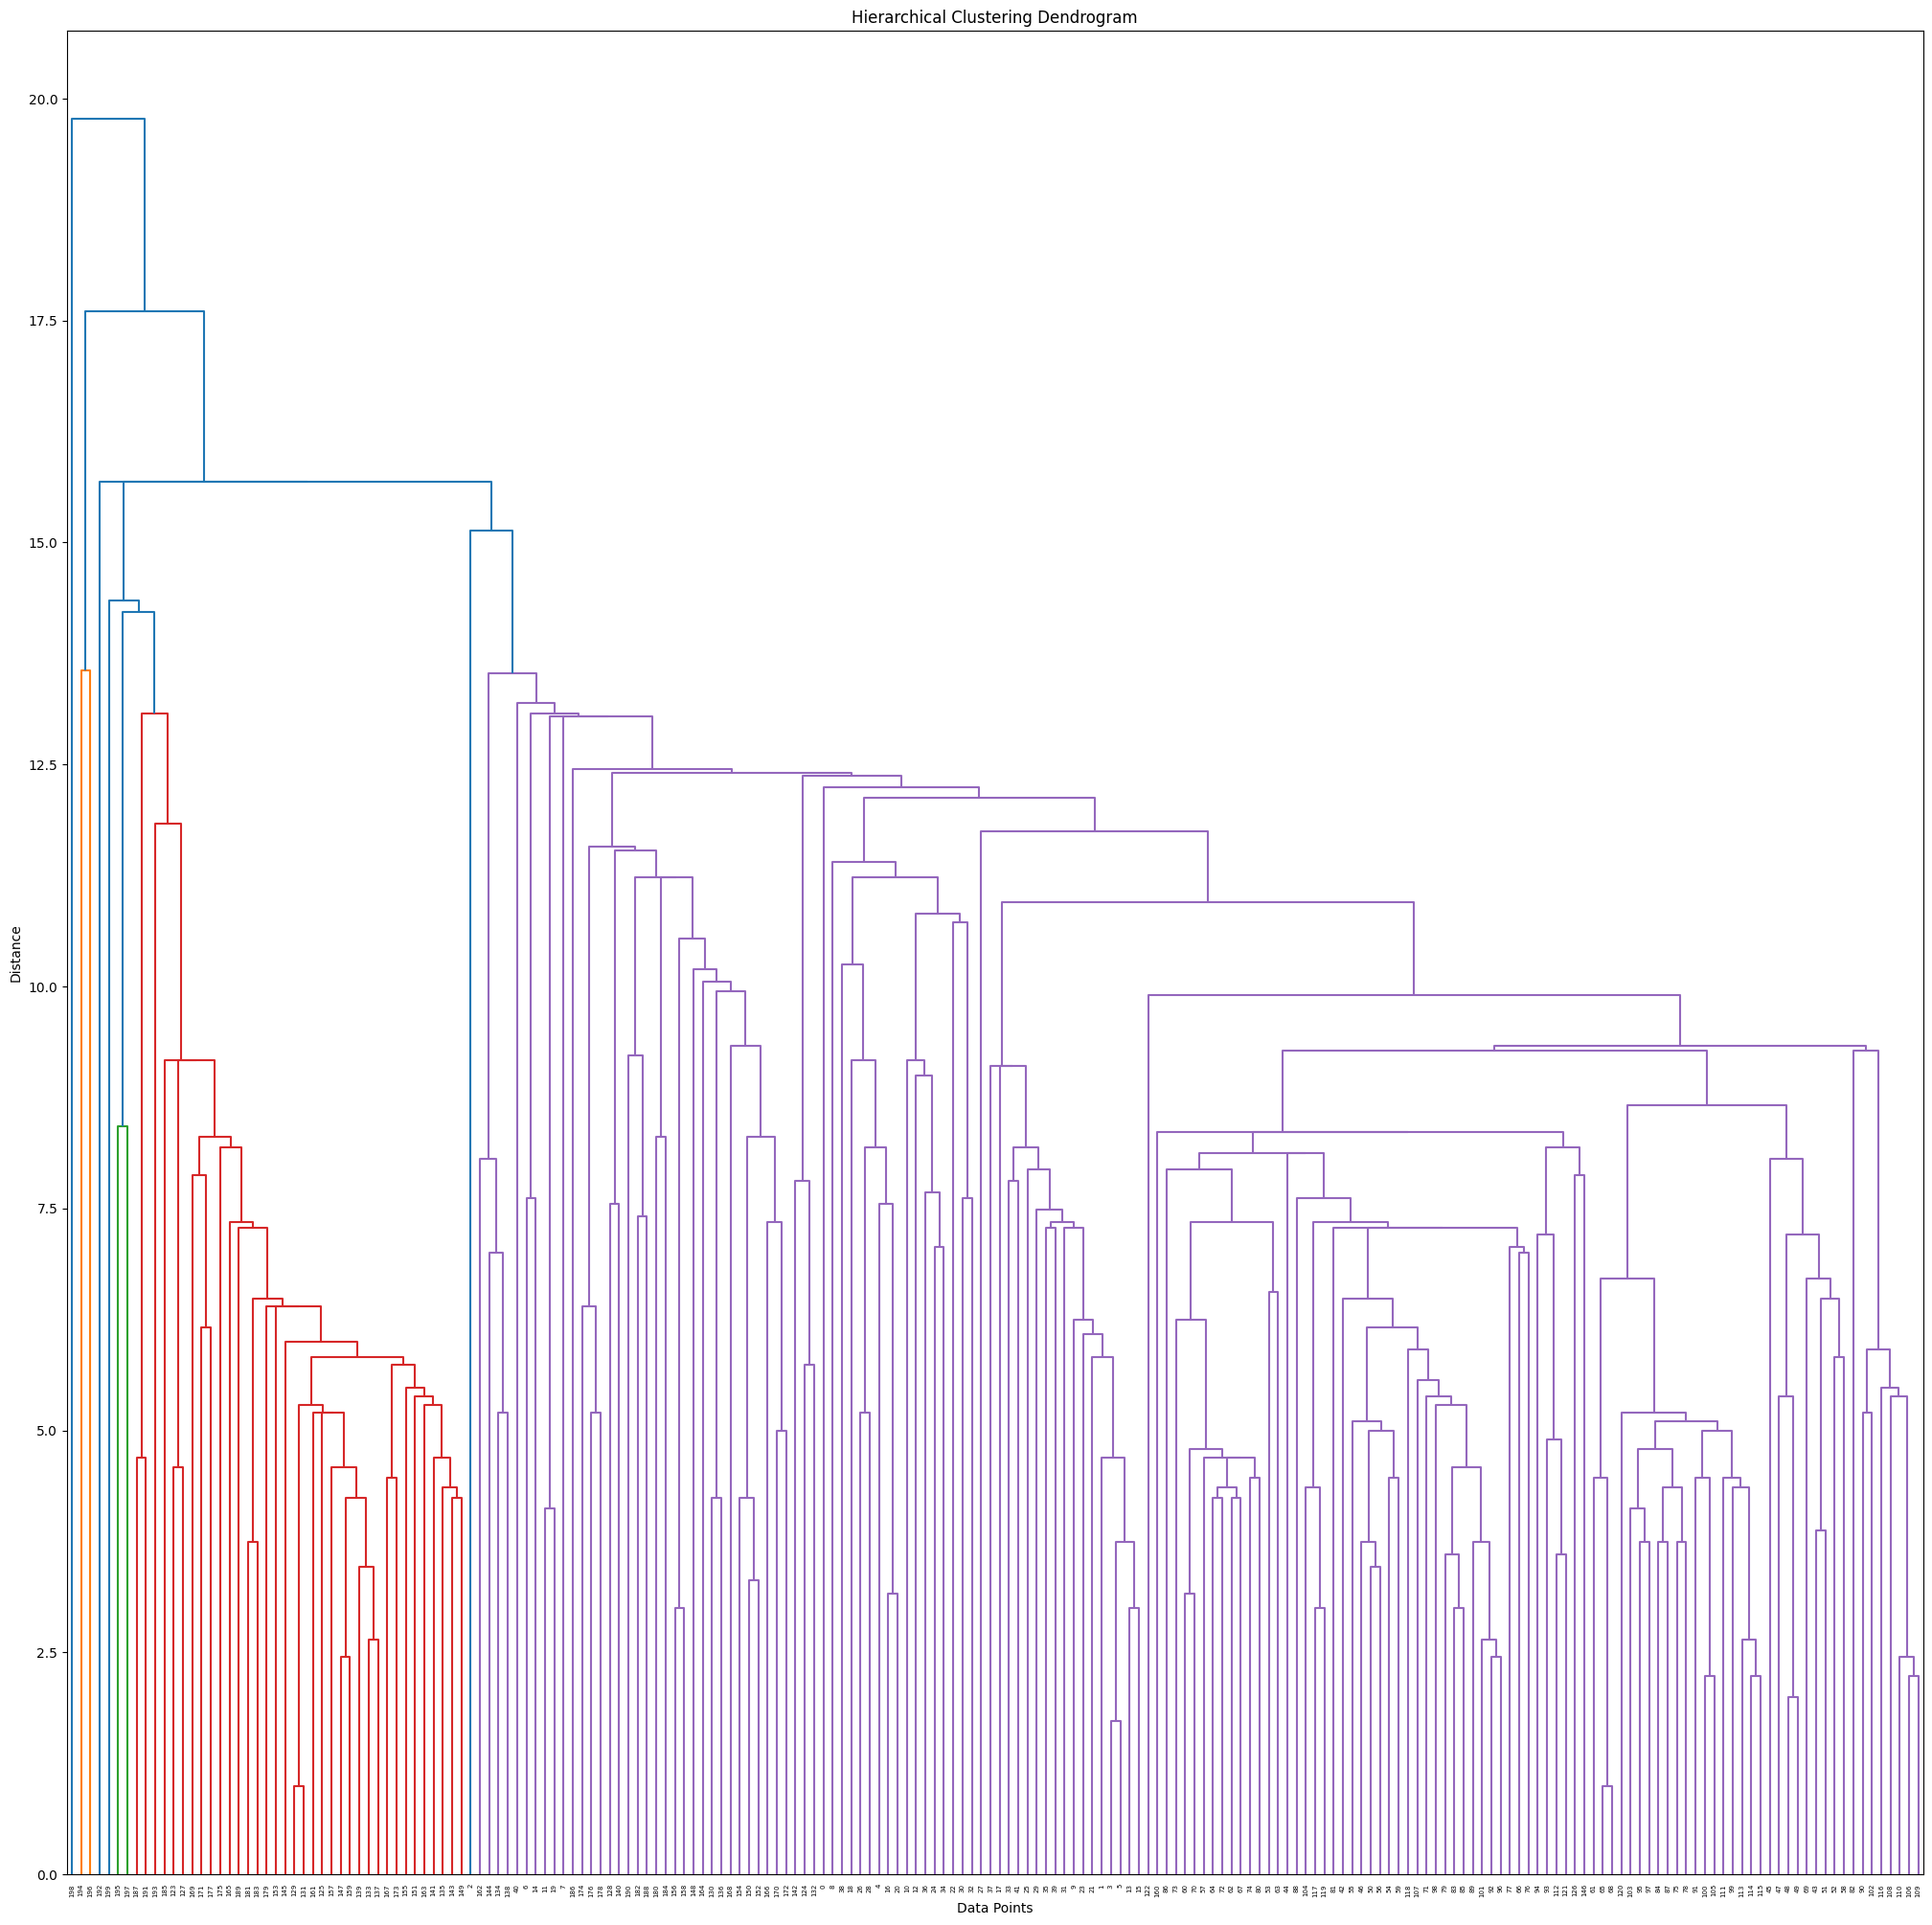

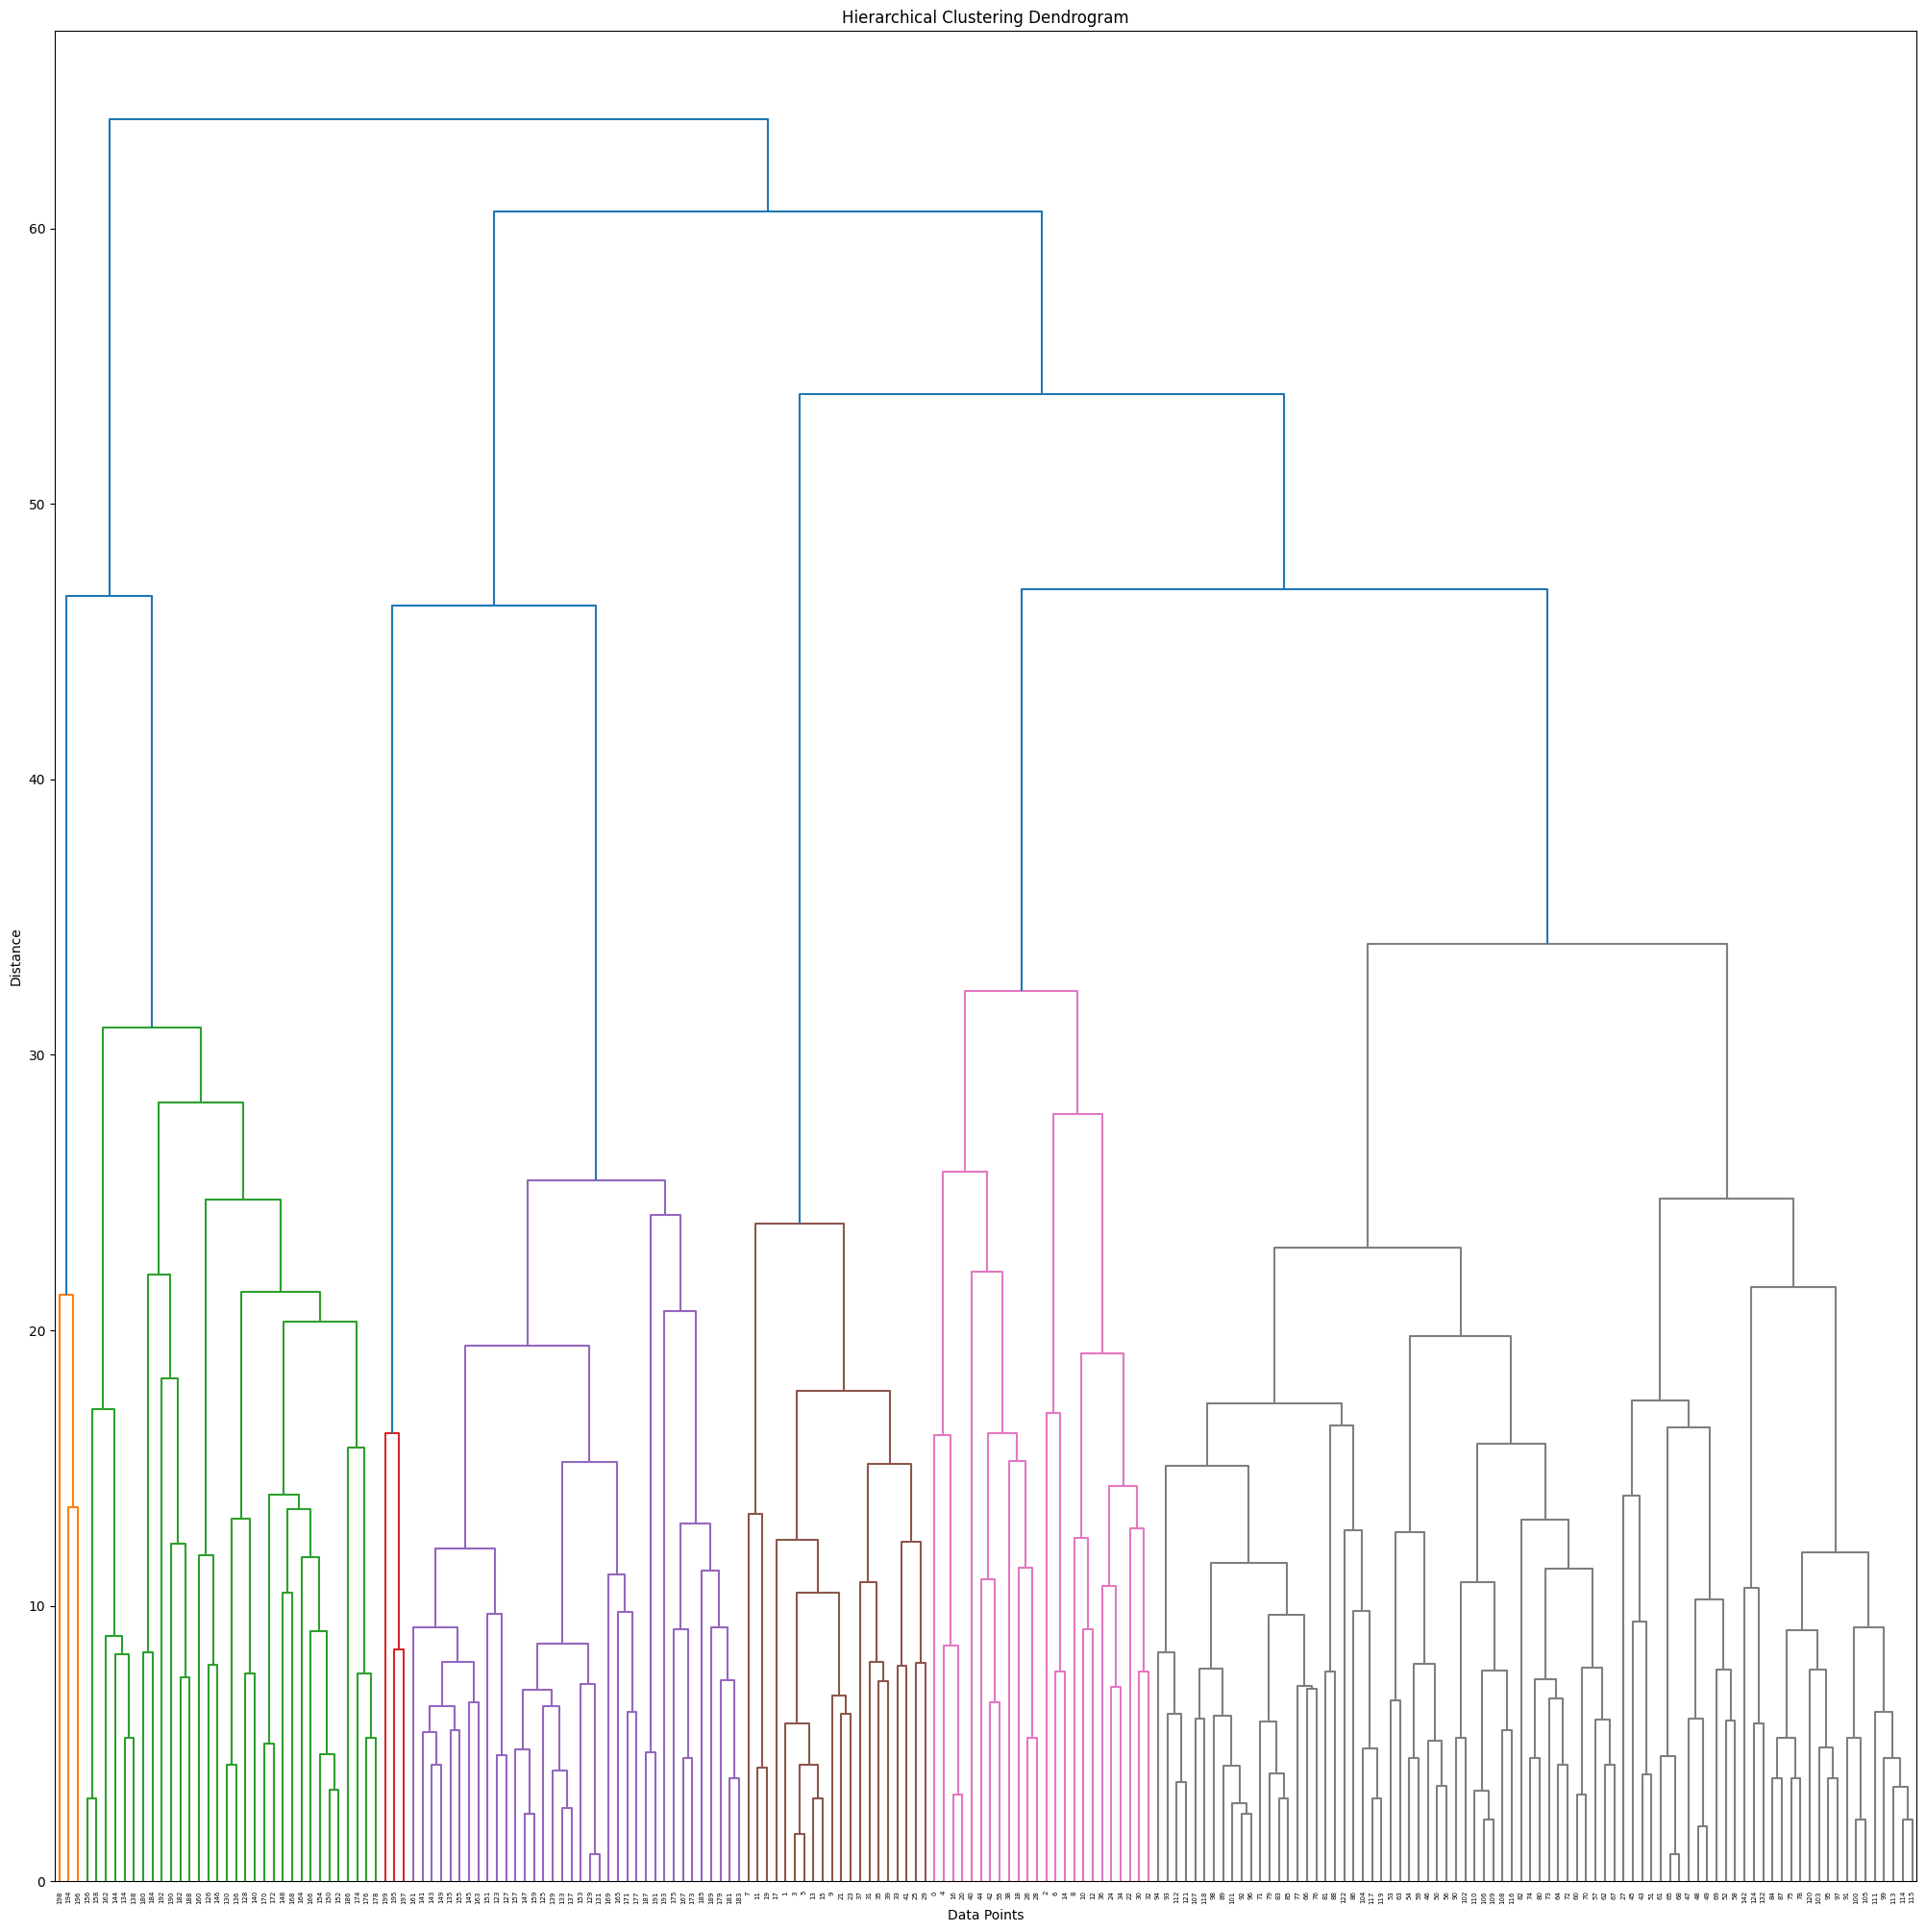

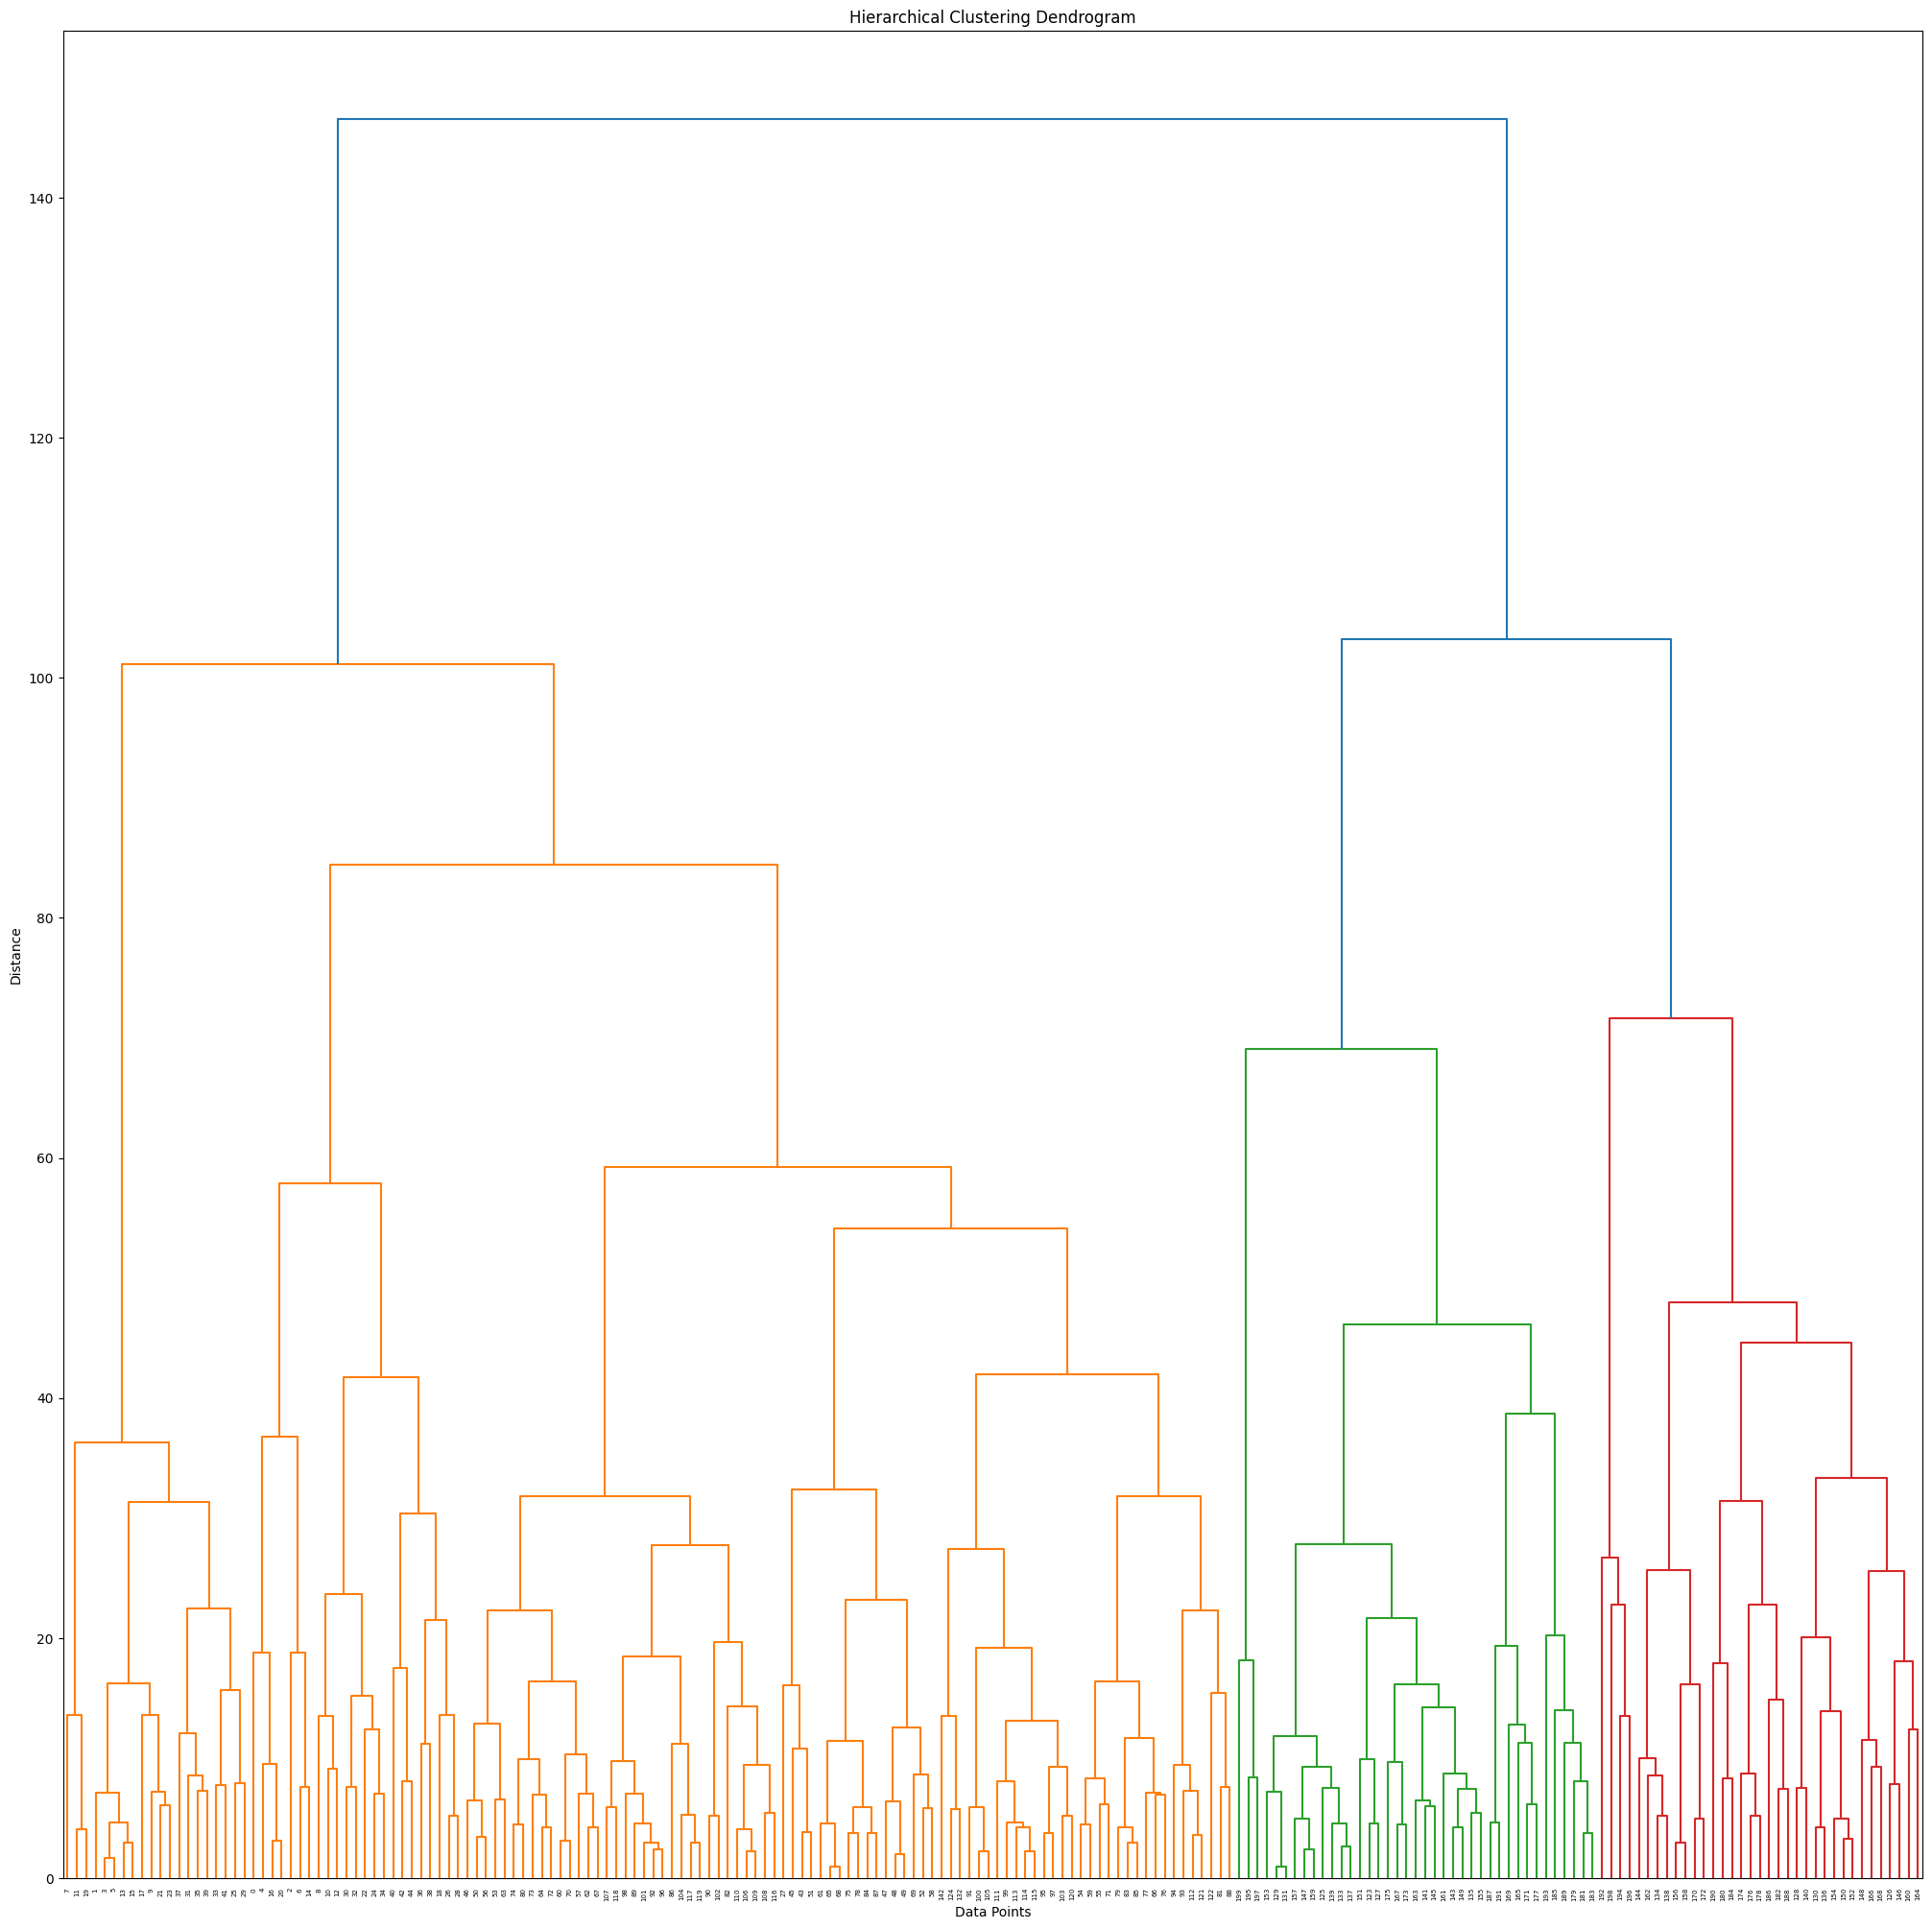

In [24]:
df = pd.read_csv("./SMAI-Dataset-hc-dataset/new_customers.csv")
df.drop('CustomerID', axis = 1, inplace = True)

selected_features = ["Genre","Age","Annual Income (k$)","Spending Score (1-100)"]
new_data = df[selected_features]

data = df.to_numpy()
data[:, 0][data[:, 0] == 'Male'] = 0
data[:, 0][data[:, 0] == 'Female'] = 1

hCluster = HierarchialClustering(data)
hier_linkage_single_euc = hCluster.get_linkages("single", "euclidean")
hier_linkage_avg_euc = hCluster.get_linkages("average", "euclidean")
hier_linkage_complete_euc = hCluster.get_linkages("complete", "euclidean")

hCluster.dendogram(hier_linkage_single_euc)
hCluster.dendogram(hier_linkage_avg_euc)
hCluster.dendogram(hier_linkage_complete_euc)

(58, 12)


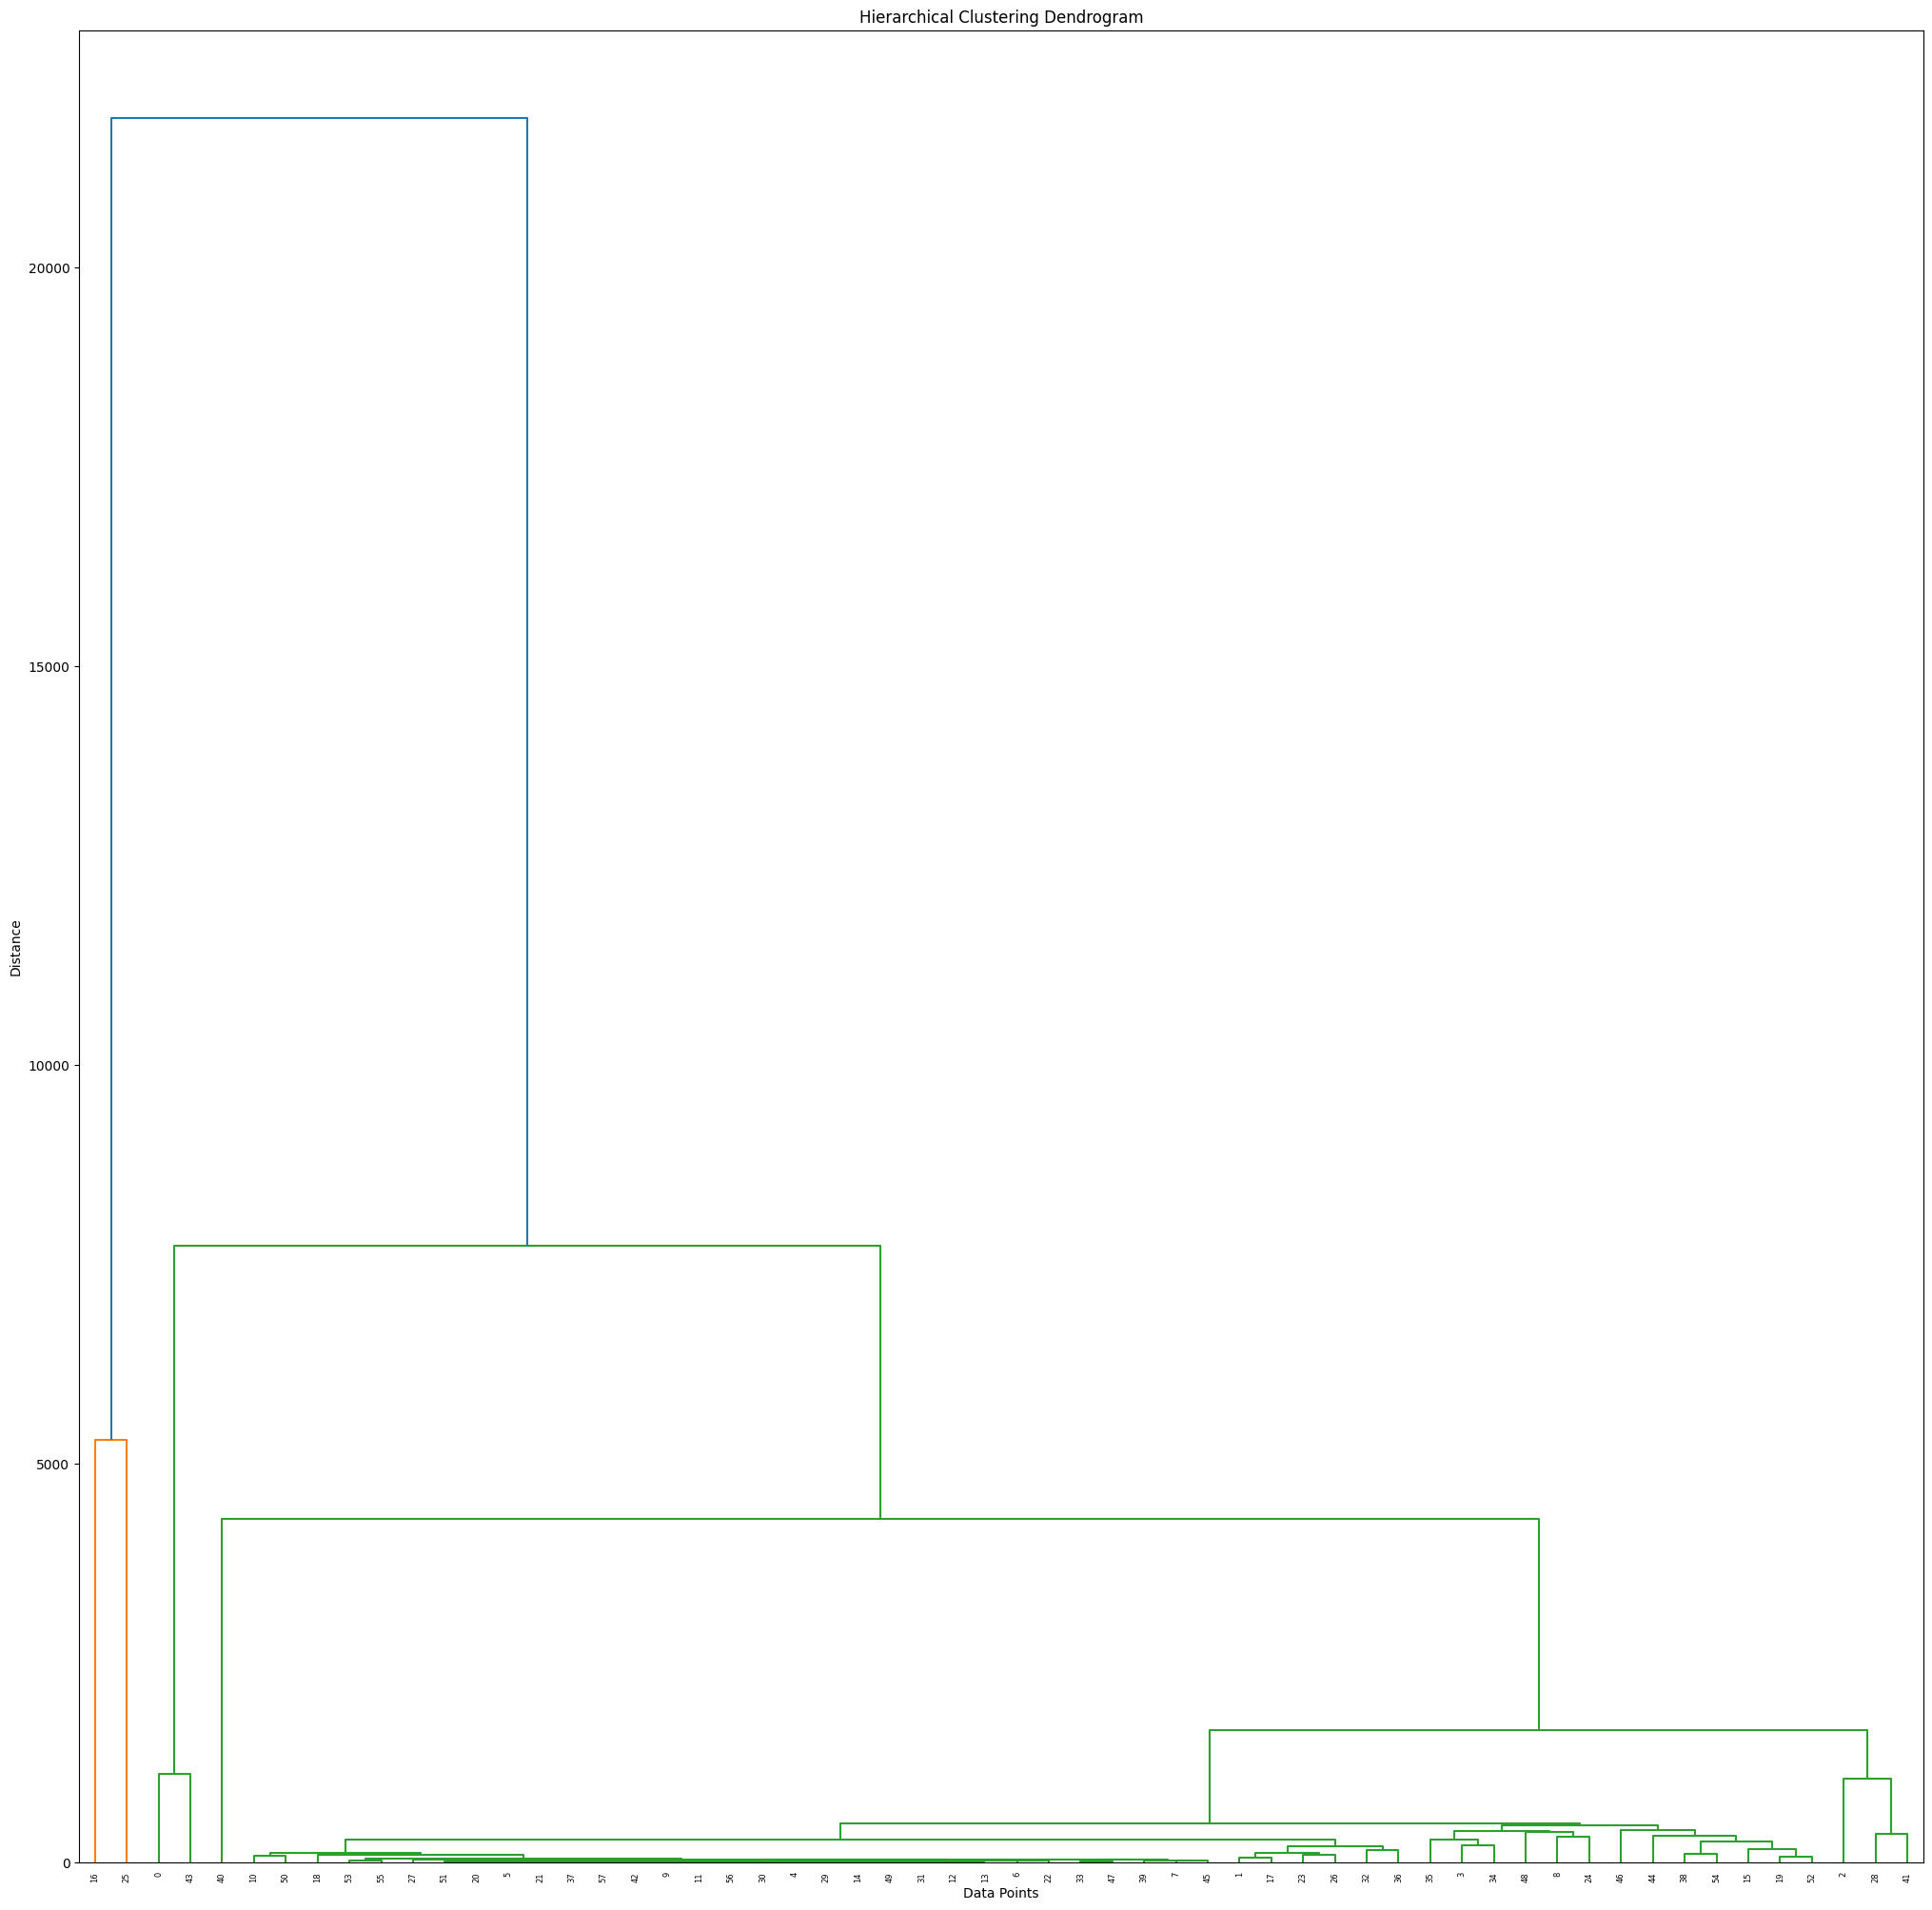

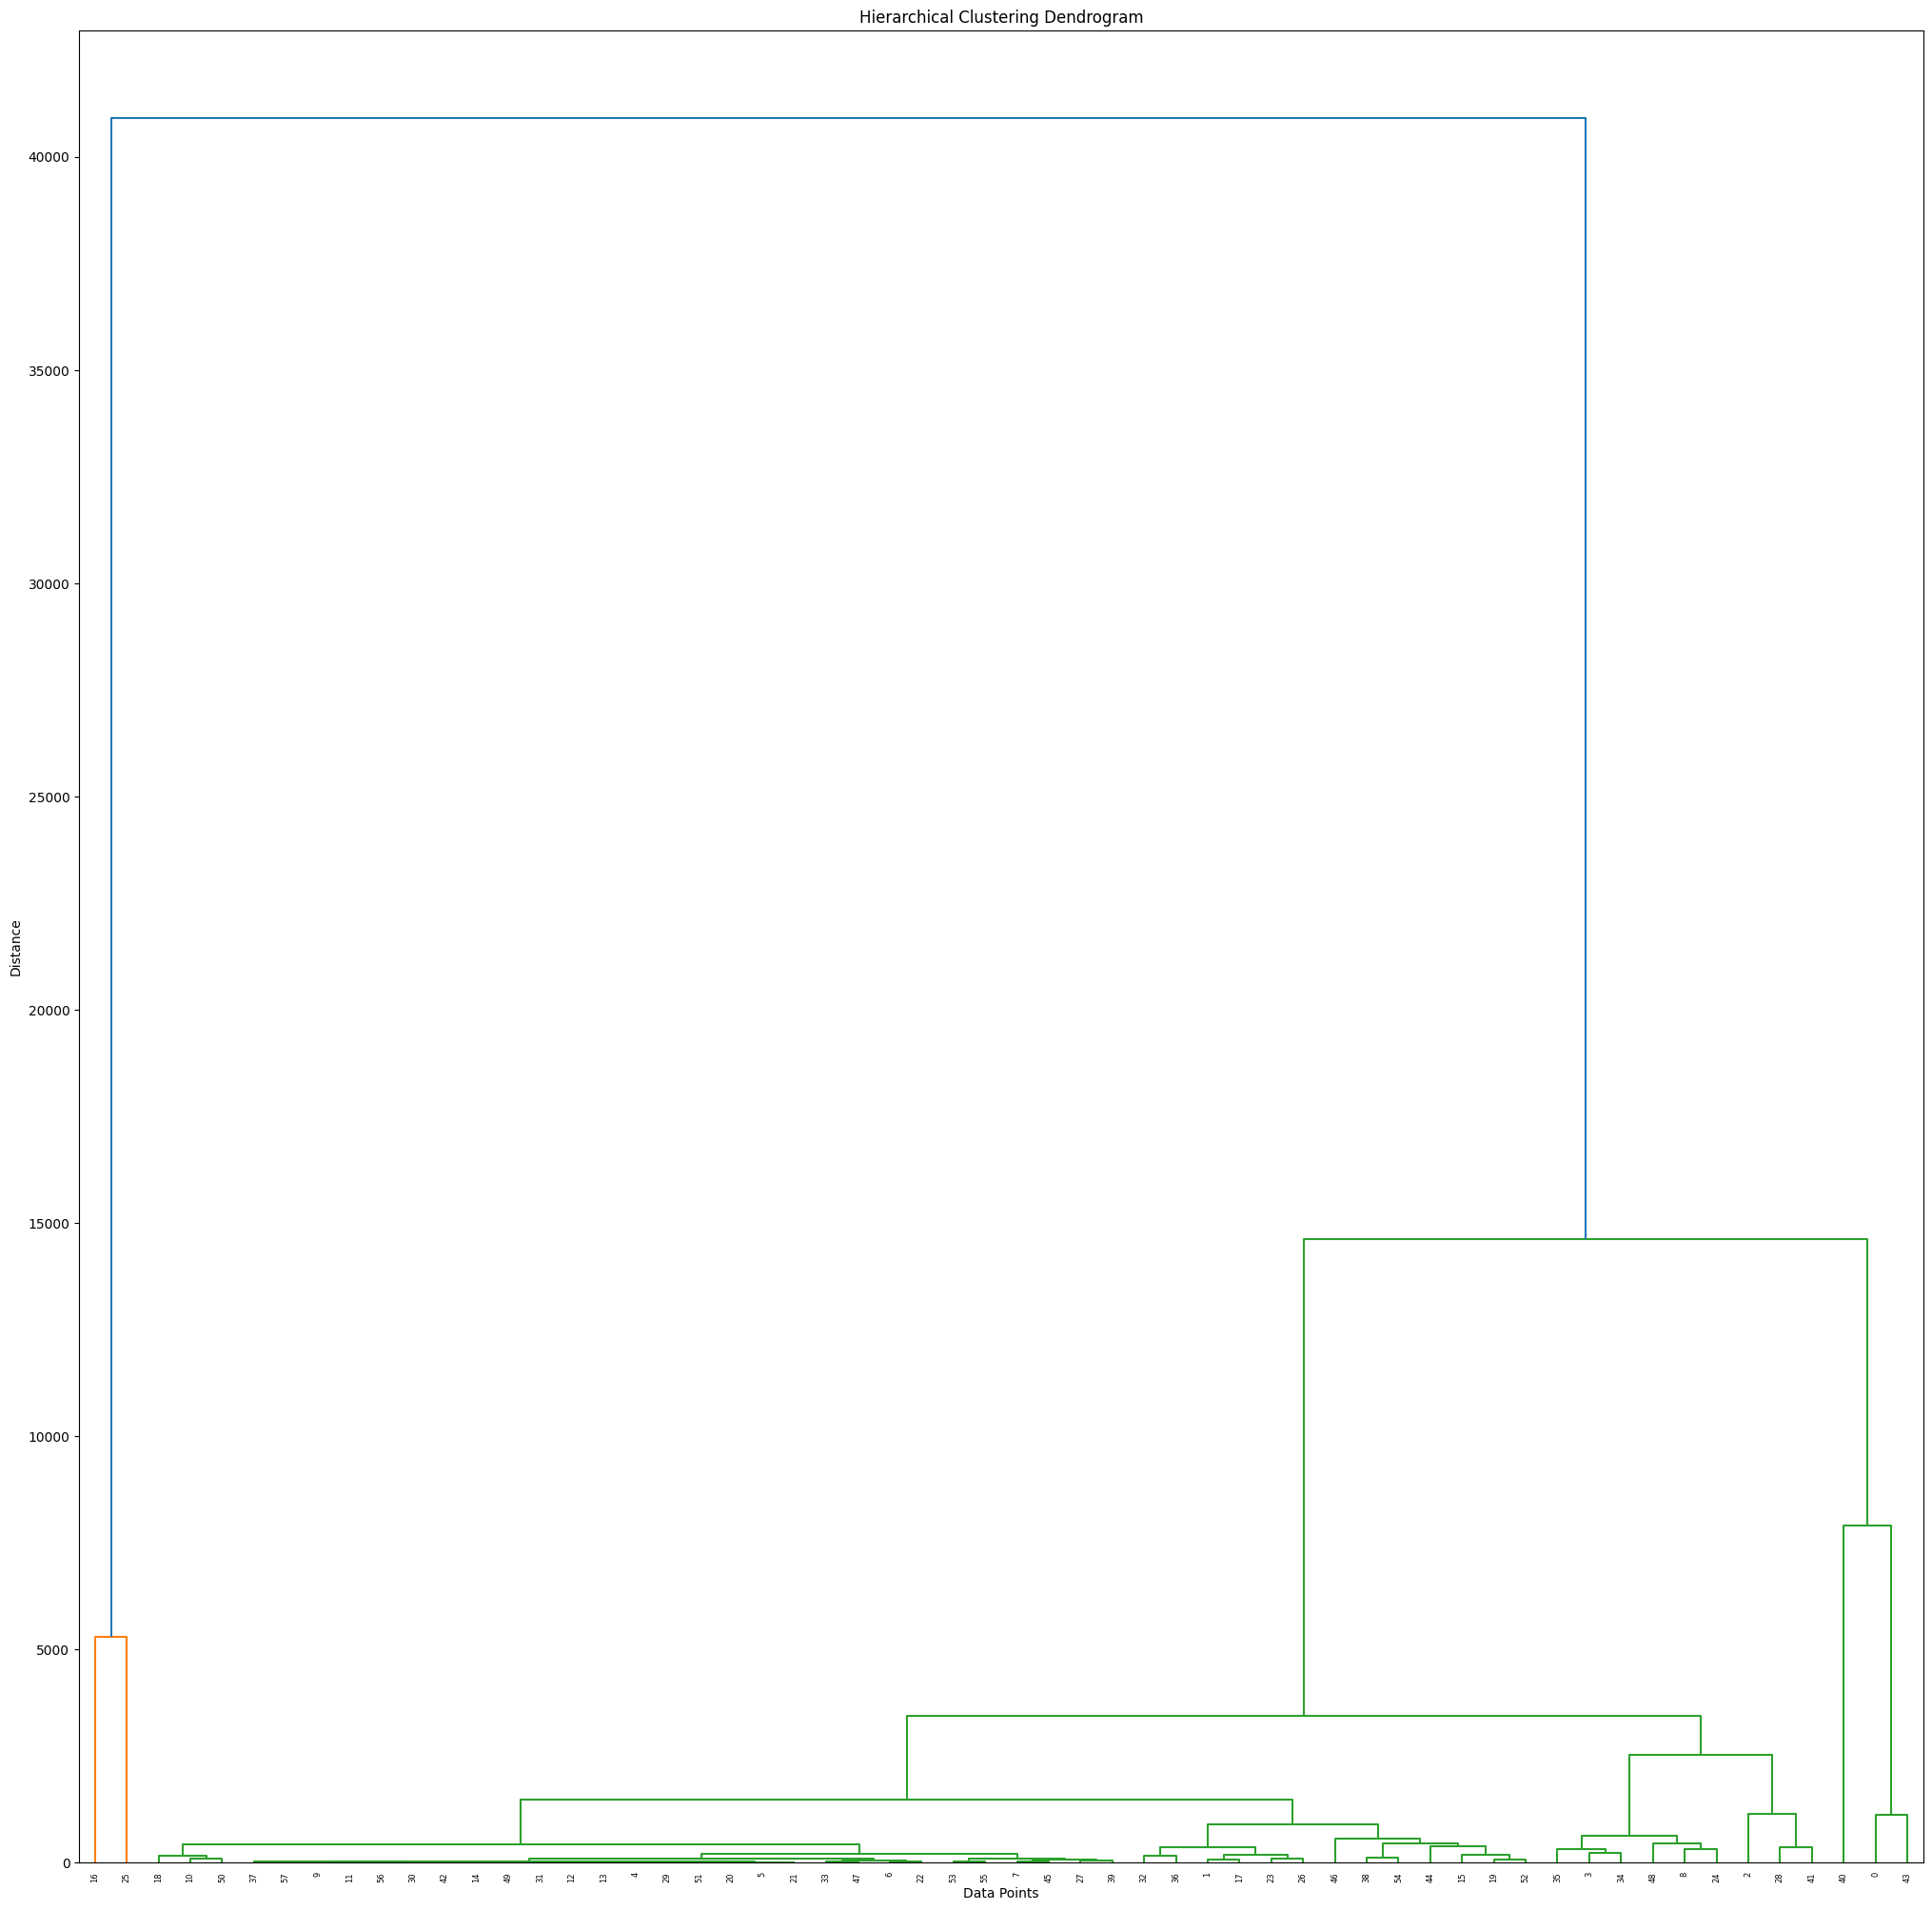

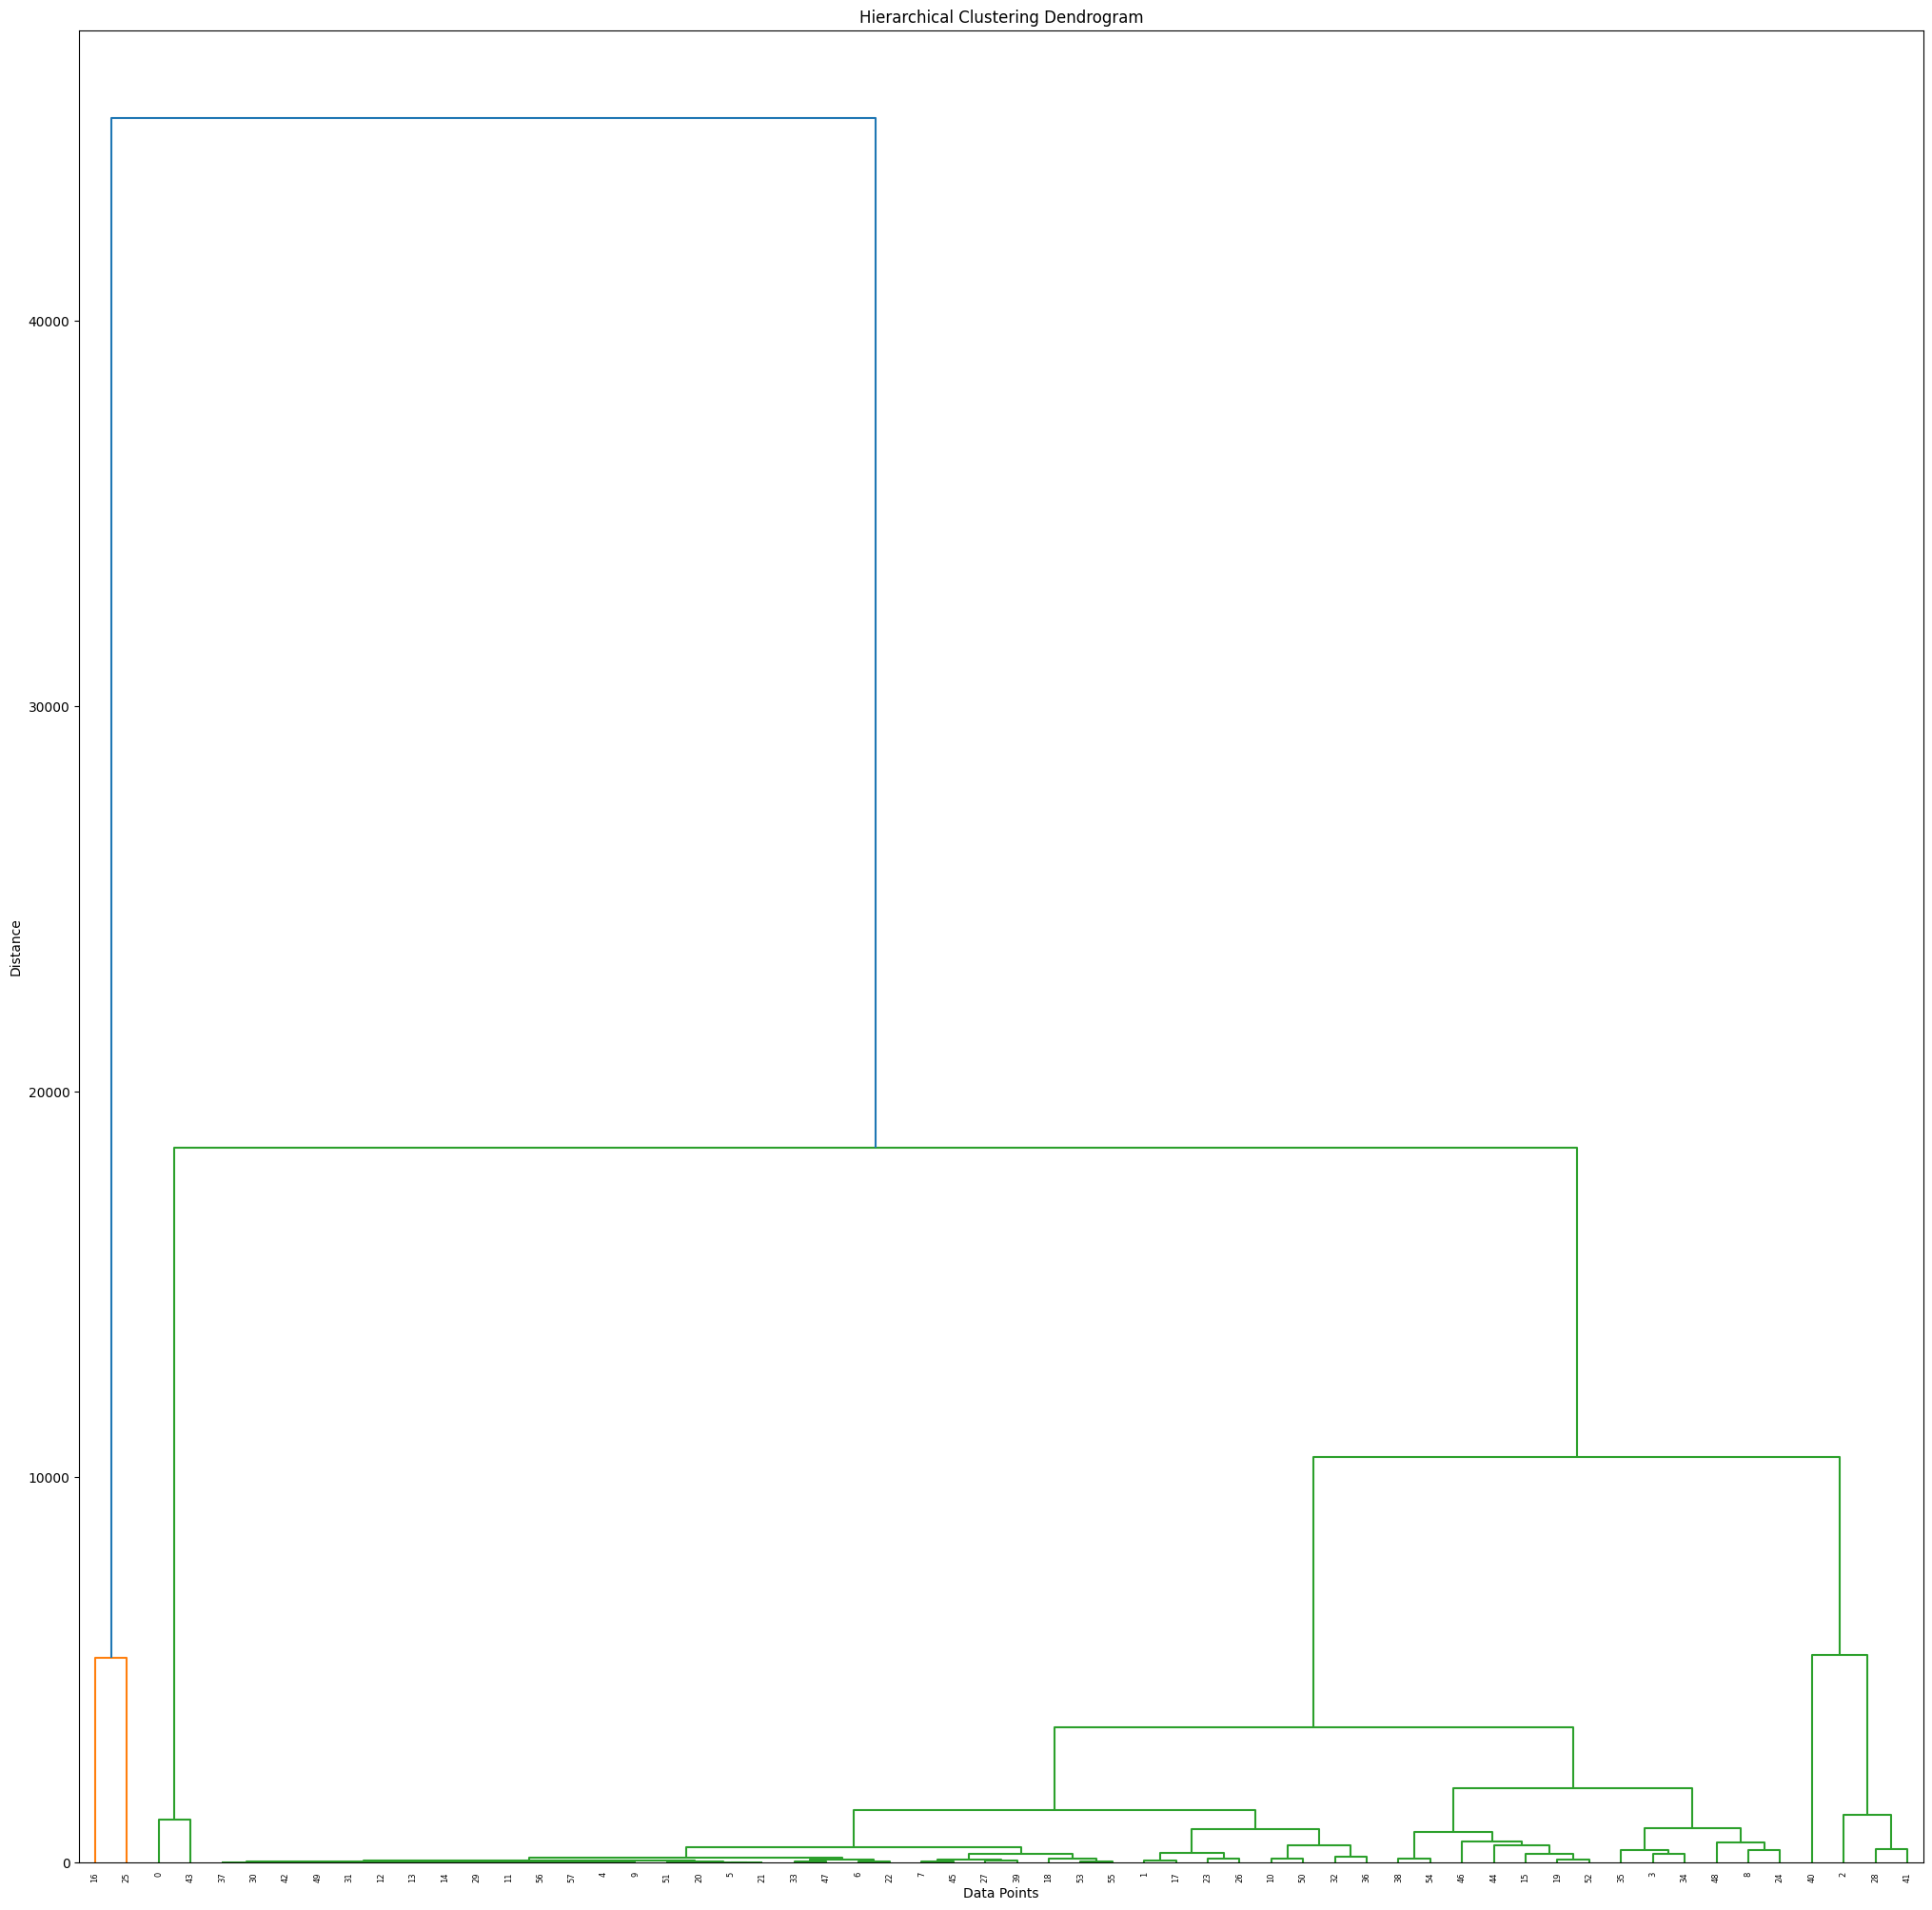

In [25]:
gene_df = pd.read_csv("./SMAI-Dataset-gene-expression/gene.csv")
gene_df.drop('ID_REF', axis = 1, inplace = True)

gene_data = gene_df.to_numpy()

print(gene_data.shape)

geneCluster = HierarchialClustering(gene_data)
gene_linkage_single_euc = geneCluster.get_linkages("single", "euclidean")
gene_linkage_avg_euc = geneCluster.get_linkages("average", "euclidean")
gene_linkage_complete_euc = geneCluster.get_linkages("complete", "euclidean")

geneCluster.dendogram(gene_linkage_single_euc)
geneCluster.dendogram(gene_linkage_avg_euc)
geneCluster.dendogram(gene_linkage_complete_euc)

## Observation

1) The generated cluster structures are influenced by the linkage method selection.
2) Single linkage may cause chaining and increased sensitivity to outliers, although it is appropriate for locating elongated or non-globular clusters.
3) Complete linkage creates compact, well-separated clusters but may overlook smaller ones.
4) Average linkage offers a balanced strategy and is adaptable to different cluster sizes and configurations.
5) We observe that the type of linkage used should be compatible with the features of the data and clustering objectives.